In [2]:
import numpy as np
import pandas as pd
from scipy import stats, integrate
from scipy.stats import norm
from operator import itemgetter
import matplotlib.pyplot as plt

%matplotlib inline

si = pd.read_csv('si-original.csv')

## dada as notas de um determinado aluno
## vamos criar uma distribuição normal baseado em suas notas

# aluno de exemplo = Rogério
aluno = si.loc[si['MATRICULA']==X]
notas = aluno['NOTAS']

notas.unique()

array(['7.80', '6.90', '7.60', '9.00', '7.00', '9.70', '9.30', '8.80',
       '6.00', '8.00', '9.20', '8.90', '8.60', '8.30', '9.60', '7.70',
       '10.00', '9.90', '09/10/2016', '7.50', '8.70'], dtype=object)

In [3]:
# retirando a data
notas = notas[~notas.str.contains("/",na=False)]
notas.unique()

array(['7.80', '6.90', '7.60', '9.00', '7.00', '9.70', '9.30', '8.80',
       '6.00', '8.00', '9.20', '8.90', '8.60', '8.30', '9.60', '7.70',
       '10.00', '9.90', '7.50', '8.70'], dtype=object)

In [4]:
notas = pd.to_numeric(notas)

n = pd.DataFrame(notas)

n.describe()

,NOTAS
count,32.000000
mean,8.634375
std,1.051760
min,6.000000
25%,7.950000
50%,8.850000
75%,9.375000
max,10.000000


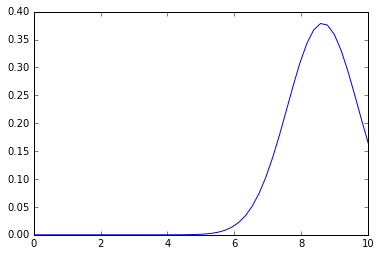

In [5]:
#Definindo o range das notas. Neste caso as notas só podem ir de zero a 10
x = np.linspace(0.0, 10.0)

## loc=média and scale=desvio padrão
y = norm.pdf(x, loc=n.mean(), scale=n.std()) 

plt.plot(x,y)
plt.show()

In [6]:
## pdf pode-se passar várias notas como um array ex.: [10,9,8] 
## A função retorna um array com as probabilidades de cada nota
#p = stats.norm(n.mean(), n.std()).pdf(x)
#p

probabilidades = [] # armazenar a nota e sua probabilidade
aux = 0.0
for i in range(21):
    p = stats.norm(n.mean(), n.std()).pdf(aux)
    p = p[0]
    print("A probabilidade do aluno tirar nota " + str(aux) + " é: " + str(p*100) + "%")
    probabilidades += [(aux, p*100)]
    aux += 0.5


A probabilidade do aluno tirar nota 0.0 é: 8.79697701147e-14%
A probabilidade do aluno tirar nota 0.5 é: 3.8921380964e-12%
A probabilidade do aluno tirar nota 1.0 é: 1.37370319199e-10%
A probabilidade do aluno tirar nota 1.5 é: 3.86765258408e-09%
A probabilidade do aluno tirar nota 2.0 é: 8.68664128044e-08%
A probabilidade do aluno tirar nota 2.5 é: 1.55634616955e-06%
A probabilidade do aluno tirar nota 3.0 é: 2.22438725093e-05%
A probabilidade do aluno tirar nota 3.5 é: 0.000253608891505%
A probabilidade do aluno tirar nota 4.0 é: 0.00230657954737%
A probabilidade do aluno tirar nota 4.5 é: 0.0167348675794%
A probabilidade do aluno tirar nota 5.0 é: 0.0968558832813%
A probabilidade do aluno tirar nota 5.5 é: 0.447177160913%
A probabilidade do aluno tirar nota 6.0 é: 1.64696020299%
A probabilidade do aluno tirar nota 6.5 é: 4.83878669913%
A probabilidade do aluno tirar nota 7.0 é: 11.3406966507%
A probabilidade do aluno tirar nota 7.5 é: 21.2027831563%
A probabilidade do aluno tirar no

In [7]:
# ordenar array pela maior probabilidade
probabilidades = sorted(probabilidades,key=itemgetter(1), reverse=True)

print("As notas mais provaveis de serem tiradas pelo aluno:")
for individual in probabilidades:
    print("Nota: " + str(individual[0]) + ", probabilidade: " + str(individual[1]) + "%")

As notas mais provaveis de serem tiradas pelo aluno:
Nota: 8.5, probabilidade: 37.6225991245%
Nota: 9.0, probabilidade: 35.7068533946%
Nota: 8.0, probabilidade: 31.6224774992%
Nota: 9.5, probabilidade: 27.0336226988%
Nota: 7.5, probabilidade: 21.2027831563%
Nota: 10.0, probabilidade: 16.327015248%
Nota: 7.0, probabilidade: 11.3406966507%
Nota: 6.5, probabilidade: 4.83878669913%
Nota: 6.0, probabilidade: 1.64696020299%
Nota: 5.5, probabilidade: 0.447177160913%
Nota: 5.0, probabilidade: 0.0968558832813%
Nota: 4.5, probabilidade: 0.0167348675794%
Nota: 4.0, probabilidade: 0.00230657954737%
Nota: 3.5, probabilidade: 0.000253608891505%
Nota: 3.0, probabilidade: 2.22438725093e-05%
Nota: 2.5, probabilidade: 1.55634616955e-06%
Nota: 2.0, probabilidade: 8.68664128044e-08%
Nota: 1.5, probabilidade: 3.86765258408e-09%
Nota: 1.0, probabilidade: 1.37370319199e-10%
Nota: 0.5, probabilidade: 3.8921380964e-12%
Nota: 0.0, probabilidade: 8.79697701147e-14%


In [8]:
notas

3        7.8
90       6.9
171      7.6
192      9.0
239      7.0
281      9.7
295      9.3
410      8.8
493      9.7
569      6.0
638      8.0
707      9.2
731      8.9
744      8.0
786      8.6
825      9.3
860      8.3
917      8.0
955      7.0
1014     9.6
1050     7.7
1079     9.2
1111     9.0
1145    10.0
1178     9.2
1209    10.0
1224     9.7
1239    10.0
1255     9.9
1280     7.5
1296     8.7
1310     8.7
Name: NOTAS, dtype: float64

In [29]:
# primeiro ponto do gráfico
valor1 = 6
# segundo ponto do gráfico
valor2 = 10

# calcular distribuição cumulativa
valor_area = norm.cdf(valor2, n.mean(), n.std()) - norm.cdf(valor1, n.mean(), n.std())

print("A probabilidade de a nota estar entre " + str(valor1) + " e " + str(valor2) + " é: " + str(valor_area * 100) + "%")

A probabilidade de a nota estar entre 6 e 10 é: [ 89.68009736]%


In [32]:
n.mean()

NOTAS    8.634375
dtype: float64

In [30]:
n.std()

NOTAS    1.05176
dtype: float64